### Figure 4: 
### _Synthetic Tensor Experiment: variable cutoff_

---

We consider the following synthetic problem: 

Generate an MPO $H$ and MPS $\psi$ with bond dimension $D=\chi=20$ and $n=100$ sites.

- Each site tensor for both $H$ and $\psi$ are populated with uniformly random numbers between $-\alpha$ and 1 . Here, $0 \leq \alpha \leq 1$ is a tunable parameter that sets the difficulty of the problem. 

- If $\alpha=0, H \psi$ is very compressible and computing the compressed product $H \psi$ is easy; if $\alpha=1$, then $H \psi$ is much less compressible and computing $H \psi$ is hard. 

- We set $\alpha=1 / 2$. 

- Adaptivley approximate $H\psi$ at each truncation 


/Users/pren/Research/RandomMPSMPO/results/../util/plotting.py:1237: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.85)


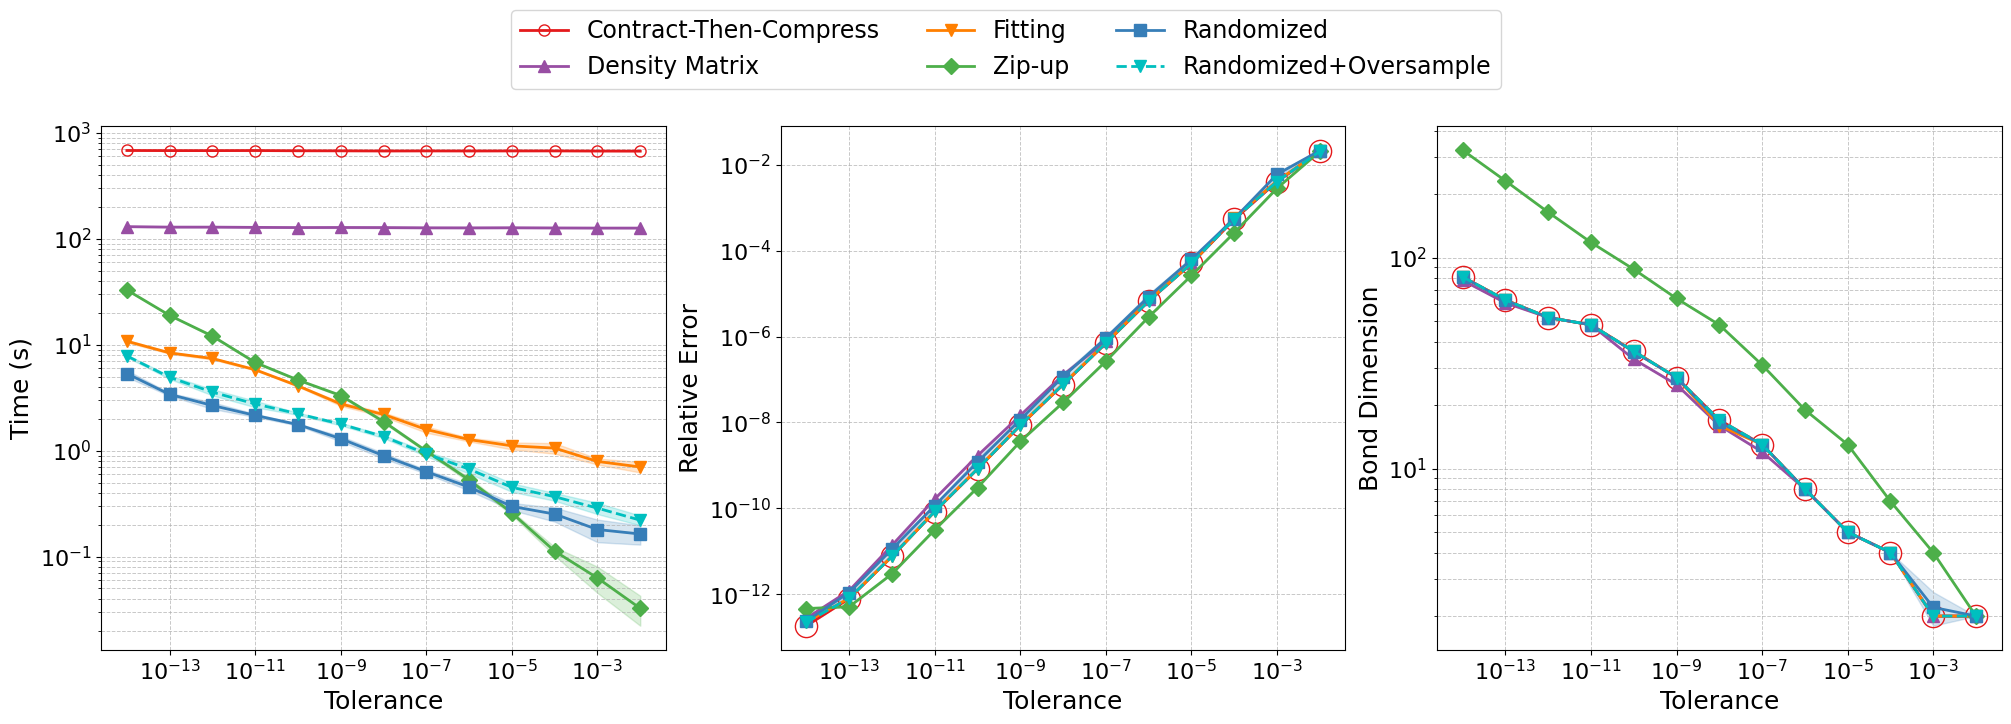

In [8]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')

from util.plotting import combined_plot4,prepare_data_for_plotting4
file_path = "data/fig4_final.csv"  
(test_names, cutoff_values, mean_times, std_times, 
 mean_acc, std_acc, mean_bond_dims, std_bond_dims) = prepare_data_for_plotting4(file_path)

combined_plot4(test_names, cutoff_values, mean_times, std_times, 
              mean_acc, std_acc, mean_bond_dims, std_bond_dims)

In [12]:
import sys
sys.path.append('../')
from util.benchmarking import *
import numpy as np 

,Cutoff Value,naive Time,naive Accuracy,zipup Time,zipup Accuracy,fit Time,fit Accuracy,density Time,density Accuracy,random Time,random Accuracy,random+oversample Time,random+oversample Accuracy
0,1.00e-02,1.26e+00,6.05e-03,8.24e-03,6.10e-03,2.63e-02,6.05e-03,4.80e+00,6.05e-03,7.75e-03,6.22e-03,8.80e-03,6.05e-03
1,1.00e-03,8.27e-01,1.05e-03,3.25e-03,8.33e-04,3.21e-02,1.05e-03,4.84e+00,1.05e-03,9.72e-03,1.10e-03,1.10e-02,1.05e-03
2,1.00e-04,7.83e-01,1.69e-04,6.25e-03,8.13e-05,3.23e-02,1.69e-04,4.71e+00,1.69e-04,9.42e-03,1.74e-04,1.37e-02,1.69e-04


/Users/pren/Research/RandomMPSMPO/results/../util/plotting.py:1237: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.85)


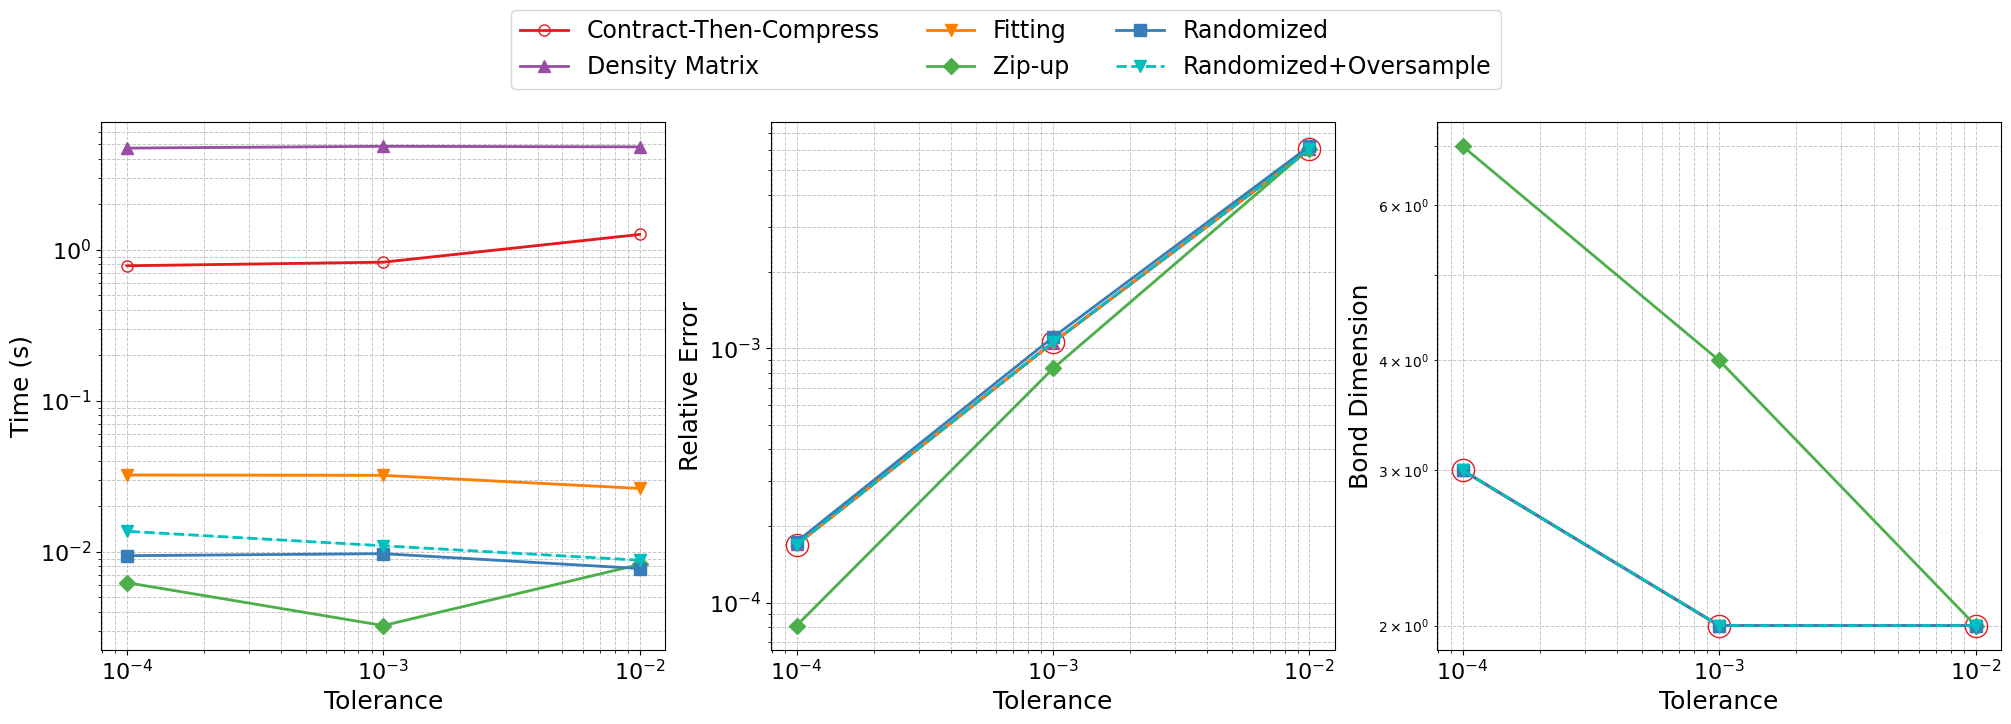

In [13]:
def benchmark(N, mpo, mps, baseline, cutoff_values, names, a, fit_sweeps=2):
    times_results = {name: [] for name in names}
    acc_results = {name: [] for name in names}
    bond_dims_results = {name: [] for name in names}

    for _ in range(N):
        times, acc, bond_dims = cutoff_synth_tensor_experiment4(
            mpo, mps, baseline, cutoff_values, names, a, highres=True, return_data=True, fit_sweeps=fit_sweeps
        )

        for name in names:
            times_results[name].append(times[name])
            acc_results[name].append(acc[name])
            bond_dims_results[name].append(bond_dims[name])

    mean_times = {name: np.mean(times_results[name], axis=0) for name in names}
    std_times = {name: np.std(times_results[name], axis=0) for name in names}
    mean_acc = {name: np.mean(acc_results[name], axis=0) for name in names}
    std_acc = {name: np.std(acc_results[name], axis=0) for name in names}
    mean_bond_dims = {name: np.mean(bond_dims_results[name], axis=0) for name in names}
    std_bond_dims = {name: np.std(bond_dims_results[name], axis=0) for name in names}

    return mean_times, std_times, mean_acc, std_acc, mean_bond_dims, std_bond_dims

a = -.5
chi = 50
n = 10
mpo,mps,baseline = generate_baseline(n,chi,a,dtype=np.complex128)

N = 1 #number of runs to average over 
cutoff_values = np.array([10**-i for i in range(2, 5)]) 
names = ['naive',  'zipup', 'fit', 'density', 'random','random+oversample']  
mean_times, std_times, mean_acc, std_acc, mean_bond_dims, std_bond_dims = benchmark(
    N, mpo, mps, baseline, cutoff_values, names, a
)
combined_plot4(test_names, cutoff_values, mean_times, std_times, 
              mean_acc, std_acc, mean_bond_dims, std_bond_dims)
